In [1]:
import pandas as pd
EducationSystem = {"Educational level": ["ECE", "Pre-primary", "Primary", "Lower secondary", "Upper secondary"], "Starting age": ["3","5","6","12","15"], "Duration":["3","1","6","3","3"]}
EducationSystem = pd.DataFrame(EducationSystem)  
print(EducationSystem)

  Educational level Starting age Duration
0               ECE            3        3
1       Pre-primary            5        1
2           Primary            6        6
3   Lower secondary           12        3
4   Upper secondary           15        3


We start by importing all the necessary modules

In [2]:
import sys, os, csv, math, statsmodels
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as diag
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.options.mode.chained_assignment = None

The user is prompted to insert the appropriate working directory

In [3]:
os.chdir("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data")  # REMOVE
if os.getcwd()!="C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data":
    print("Please insert the WORKING DIRECTORY")                                                            # We create a loop so that the user establishes the working directory
    print("Remember to separate the backslash (for Windows) or forward slash (in Mac)") 
    while True:                                                                             
        NewPath=input()                                                                                     # The user inserts the working directory
        if os.path.exists(NewPath)==True:                                                                   # If the program exists, the working directory will be updated
            os.chdir(NewPath)                                                               
            print("Your new path is " + os.getcwd())                                        
            break                                                                                           # If the condition is met, the program keeps running
        else:                                                                                               # If the condition is not met, the program requests the user to
            print("Please check if the path is correctly written")                                          # insert a new path and the condition is checked again
        continue
else: 
    print("Your path is " + os.getcwd())

Please insert the WORKING DIRECTORY
Remember to separate the backslash (for Windows) or forward slash (in Mac)
C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data
Your new path is C:\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298_RND_SDA\WorkFiles_Experts\298-Issue-Papers\298-Issue-Paper-Sprague\Replication files\Data


We import the raw data from the 2016 Census, were we keep only 2016 data, and we rename the variables for ease of use

In [4]:
Canada = pd.read_csv("Tables\\Canada\\98-400-X2016001_ENG_CSV\\98-400-X2016001_English_CSV_data.csv", usecols=['GEO_NAME', 'GEO_CODE (POR)', 'ALT_GEO_CODE', 'DIM: Census year (2)', 'DIM: Age (in single years) and average age (127)', 'Dim: Sex (3): Member ID: [3]: Female', 'Dim: Sex (3): Member ID: [2]: Male'])
Canada = Canada[Canada['DIM: Census year (2)']==2016]
Canada = Canada.rename(columns={'GEO_NAME':'Name', 'GEO_CODE (POR)':'Geocode', 'ALT_GEO_CODE':'Alt_Geocode', 'DIM: Age (in single years) and average age (127)':'Age', 'Dim: Sex (3): Member ID: [3]: Female':'Female', 'Dim: Sex (3): Member ID: [2]: Male':'Male'})
del Canada['DIM: Census year (2)']
Canada.reset_index(drop=True)

Geocode     Name  Alt_Geocode                 Age        Male  \
0            1   Canada            1         Total - Age  17264200.0   
1            1   Canada            1       0 to 14 years   2992920.0   
2            1   Canada            1        0 to 4 years    973035.0   
3            1   Canada            1        Under 1 year    189085.0   
4            1   Canada            1                   1    190900.0   
...        ...      ...          ...                 ...         ...   
22093       62  Nunavut           62                  97         0.0   
22094       62  Nunavut           62                  98         0.0   
22095       62  Nunavut           62                  99         5.0   
22096       62  Nunavut           62  100 years and over         0.0   
22097       62  Nunavut           62         Average age        27.8   

           Female  
0      17887530.0  
1       2846645.0  
2        925760.0  
3        180650.0  
4        181710.0  
...           ...  
22093         0.0  
22094         5.0  
22095         0.0  
22096         5.0  
22097        27.5  

[22098 rows x 6 columns]

We drop variables that are not single years of age, and we keep only those below or equal to 29

In [5]:
Labels_to_drop = ['Total - Age', '0 to 14 years', '0 to 4 years', 'Under 1 year', '5 to 9 years', '10 to 14 years', '15 to 64 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 years and over', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over', '85 to 89 years', '90 to 94 years', '95 to 99 years', '100 years and over', 'Average age']
for x in range(len(Labels_to_drop)) :
    Canada = Canada[Canada['Age']!=Labels_to_drop[x]]
Canada['Age'] = Canada['Age'].astype(int)
Canada = Canada[Canada['Age']<=29]
CanadaLong = Canada
Canada

Geocode     Name  Alt_Geocode  Age      Male    Female
4            1   Canada            1    1  190900.0  181710.0
5            1   Canada            1    2  193940.0  184945.0
6            1   Canada            1    3  198615.0  187590.0
7            1   Canada            1    4  200500.0  190865.0
9            1   Canada            1    5  202500.0  192035.0
...        ...      ...          ...  ...       ...       ...
43976       62  Nunavut           62   25     365.0     335.0
43977       62  Nunavut           62   26     310.0     315.0
43978       62  Nunavut           62   27     335.0     335.0
43979       62  Nunavut           62   28     340.0     295.0
43980       62  Nunavut           62   29     255.0     295.0

[5046 rows x 6 columns]

We proceed to transpose the table, to obtain the total population by age and sex, for each administrative unit of interest.

In [6]:
Canada = Canada.pivot_table(index=['Geocode', 'Name', 'Alt_Geocode'], columns='Age', values=['Male', 'Female'])
Canada

Female            \
Age                                                         1         2    
Geocode Name                             Alt_Geocode                       
1       Canada                           1            181710.0  184945.0   
        St. John's                       10001           965.0    1055.0   
5       Bay Roberts                      10005            35.0      50.0   
10      Grand Falls-Windsor              10010            65.0      80.0   
        Newfoundland and Labrador        10             2155.0    2235.0   
...                                                        ...       ...   
24505   Ottawa - Gatineau (Quebec part)  3550524        1970.0    2005.0   
35502   Hawkesbury (Ontario part)        3550235          35.0      40.0   
35505   Ottawa - Gatineau (Ontario part) 3550535        5015.0    5145.0   
47840   Lloydminster (Saskatchewan part) 4884047         115.0     120.0   
48840   Lloydminster (Alberta part)      4884048         125.0     140.0   

                                                                          \
Age                                                         3         4    
Geocode Name                             Alt_Geocode                       
1       Canada                           1            187590.0  190865.0   
        St. John's                       10001           985.0    1020.0   
5       Bay Roberts                      10005            65.0      60.0   
10      Grand Falls-Windsor              10010            70.0      50.0   
        Newfoundland and Labrador        10             2200.0    2295.0   
...                                                        ...       ...   
24505   Ottawa - Gatineau (Quebec part)  3550524        2030.0    2125.0   
35502   Hawkesbury (Ontario part)        3550235          35.0      35.0   
35505   Ottawa - Gatineau (Ontario part) 3550535        5295.0    5325.0   
47840   Lloydminster (Saskatchewan part) 4884047         130.0     125.0   
48840   Lloydminster (Alberta part)      4884048         150.0     125.0   

                                                                          \
Age                                                         5         6    
Geocode Name                             Alt_Geocode                       
1       Canada                           1            192035.0  197850.0   
        St. John's                       10001          1100.0    1135.0   
5       Bay Roberts                      10005            50.0      65.0   
10      Grand Falls-Windsor              10010            75.0      80.0   
        Newfoundland and Labrador        10             2450.0    2530.0   
...                                                        ...       ...   
24505   Ottawa - Gatineau (Quebec part)  3550524        2075.0    2165.0   
35502   Hawkesbury (Ontario part)        3550235          45.0      50.0   
35505   Ottawa - Gatineau (Ontario part) 3550535        5365.0    5515.0   
47840   Lloydminster (Saskatchewan part) 4884047         125.0     125.0   
48840   Lloydminster (Alberta part)      4884048         130.0     130.0   

                                                                          \
Age                                                         7         8    
Geocode Name                             Alt_Geocode                       
1       Canada                           1            199195.0  200040.0   
        St. John's                       10001          1125.0    1180.0   
5       Bay Roberts                      10005            65.0      60.0   
10      Grand Falls-Windsor              10010            70.0      60.0   
        Newfoundland and Labrador        10             2580.0    2620.0   
...                                                        ...       ...   
24505   Ottawa - Gatineau (Quebec part)  3550524        2195.0    2135.0   
35502   Hawkesbury (Ontario part)        3550235          50.0      50.0   
35505   Ottawa - Gatineau

In [7]:
Canada.to_csv('Tables\\Canada\\Population_Canada_clean.csv', index=True, header=["Female_1", "Female_2", "Female_3", "Female_4", "Female_5", "Female_6", "Female_7", "Female_8", "Female_9", "Female_10", "Female_11", "Female_12", "Female_13", "Female_14", "Female_15", "Female_16", "Female_17", "Female_18", "Female_19", "Female_20", "Female_21", "Female_22", "Female_23", "Female_24", "Female_25", "Female_26", "Female_27", "Female_28", "Female_29", "Male_1", "Male_2", "Male_3", "Male_4", "Male_5", "Male_6", "Male_7", "Male_8", "Male_9", "Male_10", "Male_11", "Male_12", "Male_13", "Male_14", "Male_15", "Male_16", "Male_17", "Male_18", "Male_19", "Male_20", "Male_21", "Male_22", "Male_23", "Male_24", "Male_25", "Male_26", "Male_27", "Male_28", "Male_29"])

## Comparing the estimated population with the actual population

### Creating the different age groups for Canada

This information was obtained from the UNESCO Institute of Statistics (data.uis.unesco.org).

#### Census data


In [8]:
CensusData = pd.read_csv("Tables\\Canada\\Population_Canada_clean.csv")

# Pre-primary (Starting age: 5 years old - Duration: 1 year)
CensusData['CD_PrePrimary_Female'] = CensusData['Female_5'] 
CensusData['CD_PrePrimary_Male'] = CensusData['Male_5']
CensusData['CD_PrePrimary'] = CensusData['CD_PrePrimary_Female'] + CensusData['CD_PrePrimary_Male']

# Primary (Starting age: 6 years old - Duration: 6 years)
CensusData['CD_Primary_Female'] = CensusData['Female_6'] + CensusData['Female_7'] + CensusData['Female_8'] + CensusData['Female_9'] + CensusData['Female_10'] + CensusData['Female_11']
CensusData['CD_Primary_Male'] = CensusData['Male_6'] + CensusData['Male_7'] + CensusData['Male_8'] + CensusData['Male_9'] + CensusData['Male_10'] + CensusData['Male_11']
CensusData['CD_Primary'] = CensusData['CD_Primary_Female'] + CensusData['CD_Primary_Male']

# Lower secondary (Starting age: 12 years old - Duration: 3 years)
CensusData['CD_LowSec_Female'] = CensusData['Female_12'] + CensusData['Female_13'] + CensusData['Female_14'] 
CensusData['CD_LowSec_Male'] = CensusData['Male_12'] + CensusData['Male_13'] + CensusData['Male_14']
CensusData['CD_LowSec'] = CensusData['CD_LowSec_Female'] + CensusData['CD_LowSec_Male']

# Upper secondary (Starting age: 15 years old - Duration: 3 years)
CensusData['CD_UppSec_Female'] = CensusData['Female_15'] + CensusData['Female_16'] + CensusData['Female_17'] 
CensusData['CD_UppSec_Male'] = CensusData['Male_15'] + CensusData['Male_16'] + CensusData['Male_17']
CensusData['CD_UppSec'] = CensusData['CD_UppSec_Female'] + CensusData['CD_UppSec_Male']


#### Estimated data

In this case the population groups were created directly using the Sprague multipliers' model in QGIS.
The information is loaded.

In [9]:
PopulationEstimates = pd.read_csv("Raster data\\Canada\\Population_estimates_can2016SchoolAge.csv", usecols=['CMAPUID', 'Area', 'Pre_primary_F', 'Pre_primary_M', 'Pre_primary_T', 'Primary_F', 'Primary_M', 'Primary_T', 'LowSec_F', 'LowSec_M', 'LowSec_T', 'UppSec_F', 'UppSec_M', 'UppSec_T'])
PopulationEstimates = PopulationEstimates.rename(columns={'CMAPUID':'Alt_Geocode', 'Pre_primary_F': 'PE_PrePrimary_Female', 'Pre_primary_M': 'PE_PrePrimary_Male', 'Pre_primary_T': 'PE_PrePrimary', 'Primary_F': 'PE_Primary_Female', 'Primary_M': 'PE_Primary_Male', 'Primary_T': 'PE_Primary', 'LowSec_F': 'PE_LowSec_Female', 'LowSec_M': 'PE_LowSec_Male', 'LowSec_T': 'PE_LowSec', 'UppSec_F': 'PE_UppSec_Female', 'UppSec_M': 'PE_UppSec_Male', 'UppSec_T': 'PE_UppSec'} )


### Combining the databases

We combine the two datasets using the unique identifying code, keeping only the identifiers, the Area of the polygon, and the relevant educational level population groups by sex.

In [10]:
MergedData0 = pd.merge(CensusData, PopulationEstimates, how='inner', on='Alt_Geocode')
MergedData = MergedData0[['Name', 'Alt_Geocode', 'Area', 'PE_PrePrimary_Female', 'PE_PrePrimary_Male', 'PE_PrePrimary', 'PE_Primary_Female', 'PE_Primary_Male', 'PE_Primary', 'PE_LowSec_Female', 'PE_LowSec_Male', 'PE_LowSec', 'PE_UppSec_Female', 'PE_UppSec_Male', 'PE_UppSec', 'CD_PrePrimary_Female', 'CD_PrePrimary_Male', 'CD_PrePrimary', 'CD_Primary_Female', 'CD_Primary_Male', 'CD_Primary', 'CD_LowSec_Female', 'CD_LowSec_Male', 'CD_LowSec', 'CD_UppSec_Female', 'CD_UppSec_Male', 'CD_UppSec']]
MergedData

Name  Alt_Geocode          Area  PE_PrePrimary_Female  \
0             St. John's        10001  8.504605e+04            847.151390   
1            Bay Roberts        10005  1.109978e+04             45.998514   
2    Grand Falls-Windsor        10010  5.764200e+03             57.772989   
3                 Gander        10011  2.653282e+05             53.387233   
4           Corner Brook        10015  1.311759e+05            127.356885   
..                   ...          ...           ...                   ...   
147        Prince George        59970  1.802846e+06            412.062891   
148         Dawson Creek        59975  2.436653e+03             58.677354   
149        Fort St. John        59977  6.468480e+04            133.626118   
150           Whitehorse        60990  8.863648e+05            206.318603   
151          Yellowknife        61995  1.367264e+04            138.273244   

     PE_PrePrimary_Male  PE_PrePrimary  PE_Primary_Female  PE_Primary_Male  \
0           1053.241868    1900.393258        5495.433987      5873.761634   
1             57.188787     103.187301         298.390347       318.932731   
2             71.827694     129.600683         374.770850       400.571573   
3             66.374995     119.762228         346.320644       370.162741   
4            158.339589     285.696474         826.158536       883.034592   
..                  ...            ...                ...              ...   
147          443.920714     855.983605        2427.422401      2574.350263   
148           63.213877     121.891231         345.662582       366.584966   
149          143.957156     277.583274         787.178462       834.825072   
150          191.036585     397.355188        1119.825693      1096.061189   
151          128.031346     266.304590         750.499126       734.572326   

       PE_Primary  PE_LowSec_Female  ...  CD_PrePrimary  CD_Primary_Female  \
0    11369.195621       2848.410170  ...         2225.0             6640.0   
1      617.323078        154.662598  ...           90.0              390.0   
2      775.342423        194.252374  ...          135.0              415.0   
3      716.483385        179.505976  ...          135.0              430.0   
4     1709.193128        428.217022  ...          285.0              815.0   
..            ...               ...  ...            ...                ...   
147   5001.772663       1187.549447  ...         1020.0             3015.0   
148    712.247548        169.105882  ...          160.0              440.0   
149   1622.003534        385.105348  ...          430.0             1185.0   
150   2215.886881        501.229824  ...          360.0              945.0   
151   1485.071452        335.920623  ...          265.0              770.0   

     CD_Primary_Male  CD_Primary  CD_LowSec_Female  CD_LowSec_Male  CD_LowSec  \
0             6910.0     13550.0            3080.0          3320.0     6400.0   
1              400.0       790.0             185.0           190.0      375.0   
2              470.0       885.0             220.0           215.0      435.0   
3              475.0       905.0             220.0           270.0      490.0   
4              935.0      1750.0             515.0           470.0      985.0   
..               ...         ...               ...             ...        ...   
147           3275.0      6290.0            1470.0          1500.0     2970.0   
148            435.0       875.0             190.0           190.0      380.0   
149           1255.0      2440.0             485.0           565.0     1050.0   
150           1070.0      2015.0             450.0           525.0      975.0   
151            790.0      1560.0             350.0           330.0      680.0   

     CD_UppSec_Female  CD_UppSec_Male  CD_UppSec  
0              3065.0          3235.0     6300.0  
1               180.0           195.0      375.0  
2               205.0           270.0      475.0  
3               225.0           235.0      4

We create additional variables. Note that PE = Population Estimates (from WorldPop) and CD = Census Data (from the 2016 Census).

In [11]:
Levels = ['PrePrimary', 'Primary', 'LowSec', 'UppSec']

for x in range(len(Levels)):
    MergedData['Dif_'+Levels[x]] = MergedData['CD_'+Levels[x]] - MergedData['PE_'+Levels[x]]
    MergedData['Dif_'+Levels[x]+'_std'] = (MergedData['Dif_'+Levels[x]] - MergedData['Dif_'+Levels[x]].mean())/MergedData['Dif_'+Levels[x]].std()
    MergedData['PE_'+Levels[x]+'_std'] = (MergedData['PE_'+Levels[x]] - MergedData['PE_'+Levels[x]].mean())/MergedData['PE_'+Levels[x]].std()
    MergedData['CD_'+Levels[x]+'_std'] = (MergedData['CD_'+Levels[x]] - MergedData['CD_'+Levels[x]].mean())/MergedData['CD_'+Levels[x]].std()
MergedData

Name  Alt_Geocode          Area  PE_PrePrimary_Female  \
0             St. John's        10001  8.504605e+04            847.151390   
1            Bay Roberts        10005  1.109978e+04             45.998514   
2    Grand Falls-Windsor        10010  5.764200e+03             57.772989   
3                 Gander        10011  2.653282e+05             53.387233   
4           Corner Brook        10015  1.311759e+05            127.356885   
..                   ...          ...           ...                   ...   
147        Prince George        59970  1.802846e+06            412.062891   
148         Dawson Creek        59975  2.436653e+03             58.677354   
149        Fort St. John        59977  6.468480e+04            133.626118   
150           Whitehorse        60990  8.863648e+05            206.318603   
151          Yellowknife        61995  1.367264e+04            138.273244   

     PE_PrePrimary_Male  PE_PrePrimary  PE_Primary_Female  PE_Primary_Male  \
0           1053.241868    1900.393258        5495.433987      5873.761634   
1             57.188787     103.187301         298.390347       318.932731   
2             71.827694     129.600683         374.770850       400.571573   
3             66.374995     119.762228         346.320644       370.162741   
4            158.339589     285.696474         826.158536       883.034592   
..                  ...            ...                ...              ...   
147          443.920714     855.983605        2427.422401      2574.350263   
148           63.213877     121.891231         345.662582       366.584966   
149          143.957156     277.583274         787.178462       834.825072   
150          191.036585     397.355188        1119.825693      1096.061189   
151          128.031346     266.304590         750.499126       734.572326   

       PE_Primary  PE_LowSec_Female  ...  PE_Primary_std  CD_Primary_std  \
0    11369.195621       2848.410170  ...       -0.023716        0.011220   
1      617.323078        154.662598  ...       -0.281203       -0.280027   
2      775.342423        194.252374  ...       -0.277419       -0.277859   
3      716.483385        179.505976  ...       -0.278828       -0.277402   
4     1709.193128        428.217022  ...       -0.255055       -0.258115   
..            ...               ...  ...             ...             ...   
147   5001.772663       1187.549447  ...       -0.176204       -0.154490   
148    712.247548        169.105882  ...       -0.278930       -0.278087   
149   1622.003534        385.105348  ...       -0.257143       -0.242366   
150   2215.886881        501.229824  ...       -0.242920       -0.252067   
151   1485.071452        335.920623  ...       -0.260422       -0.262452   

     Dif_LowSec  Dif_LowSec_std  PE_LowSec_std  CD_LowSec_std  Dif_UppSec  \
0    658.925043        0.243445      -0.009909       0.006837  410.469756   
1     63.271873       -0.177657      -0.278791      -0.278657   55.211067   
2     43.477230       -0.191651      -0.274839      -0.275814   73.353058   
3    128.199134       -0.131756      -0.276311      -0.273208   88.843526   
4    121.912919       -0.136201      -0.251486      -0.249753   84.594826   
..          ...             ...            ...            ...         ...   
147  537.765322        0.157790      -0.173775      -0.155694  516.270412   
148   33.652155       -0.198597      -0.277077      -0.278420   38.519452   
149  261.260985       -0.037687      -0.255168      -0.246673  189.026203   
150  -29.245538       -0.243063      -0.244495      -0.250226 -145.360046   
151    6.961863       -0.217466      -0.260898      -0.264205  -22.400497   

     Dif_UppSec_std  PE_UppSec_std  CD_UppSec_std  
0          0.249651      -0.020717      -0.008197  
1         -0.084359      -0.279422      -0.277294  
2         -0.067302      -0.275620      -0.272752  
3         -0.052738      -0.277036      -0.273434  
4         -0.056733      -0.253150      -0.250271  
..      

We begin by creating overlapping histograms for each educational level. If the methodology works, they should generally overlap. 

Pre-primary


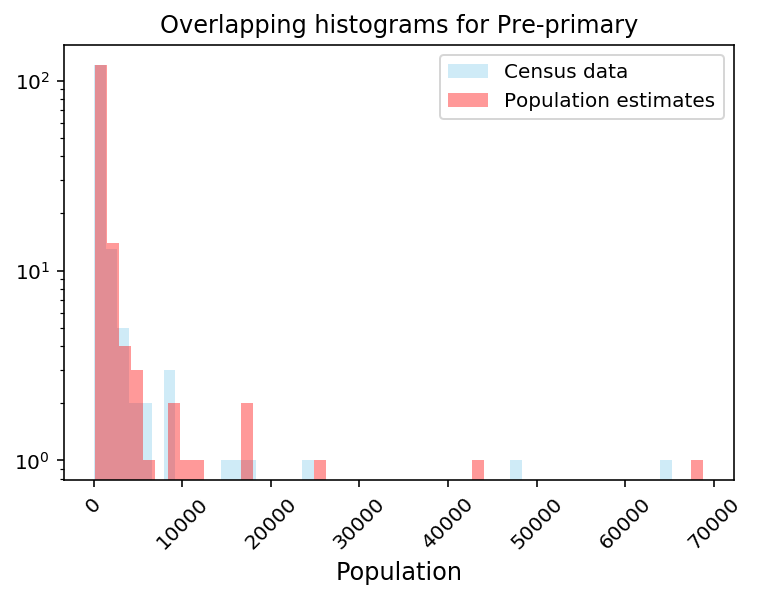

Primary


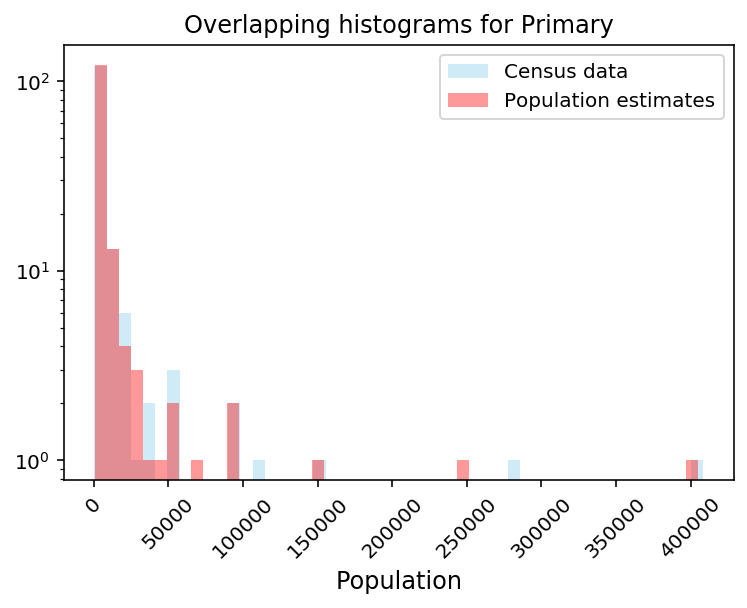

Lower secondary


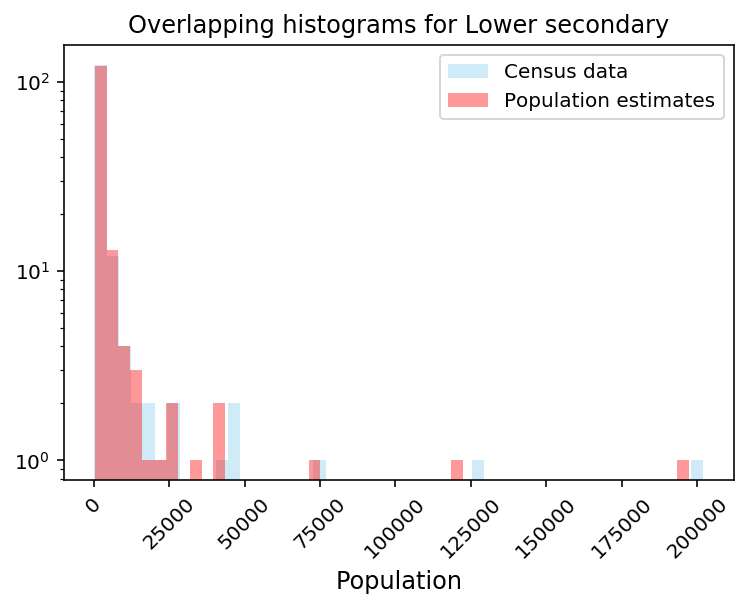

Upper secondary


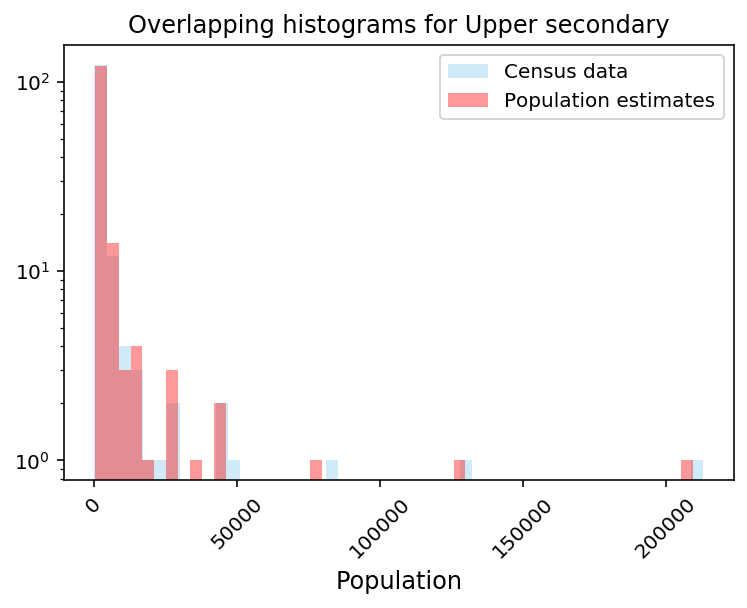

In [12]:
bars = ['Pre-primary', 'Primary', 'Lower secondary', 'Upper secondary']
for x in range(len(Levels)):
    print(bars[x])
    sns.distplot( MergedData["CD_"+Levels[x]] , color="skyblue", label="Census data", hist=True, kde=False, rug=False)
    sns.distplot( MergedData["PE_"+Levels[x]] , color="red", label="Population estimates", hist=True, kde=False, rug=False)
    plt.xlabel('Population', color = 'black', fontsize='12')
    plt.title("Overlapping histograms for " + bars[x])
    plt.legend()
    plt.xticks(color='black', rotation=45)
    plt.yscale('log')
    plt.show()


We then plot to see if the difference between the estimates and the actual data is related to the area of the polygon. While we see that there seems to be some relation, it is also clear that this behavior is also related to densely populated areas. This will be tested further down.

Pre-primary


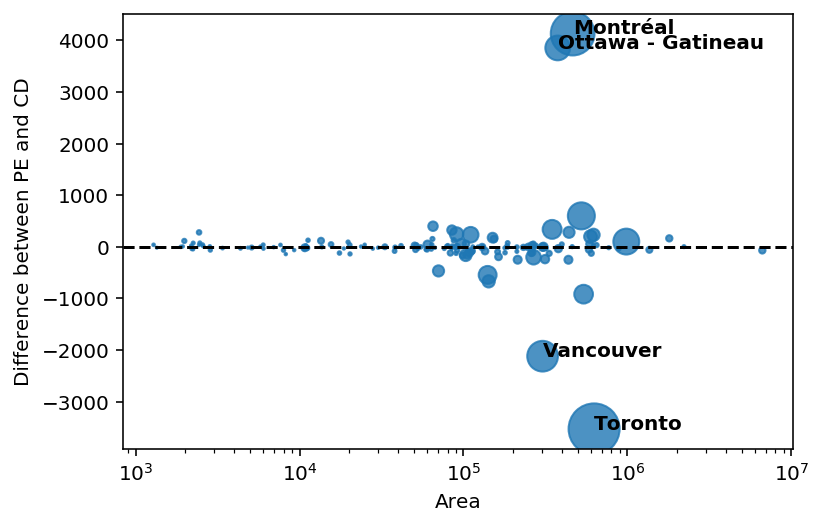

Primary


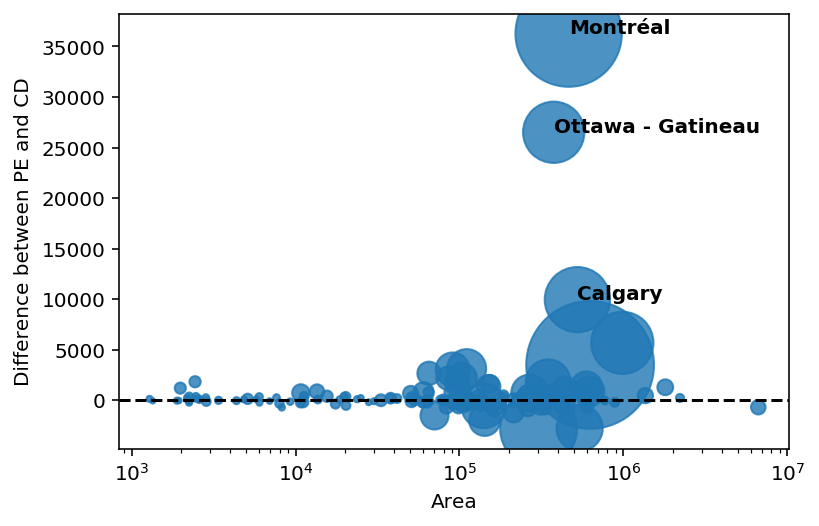

Lower secondary


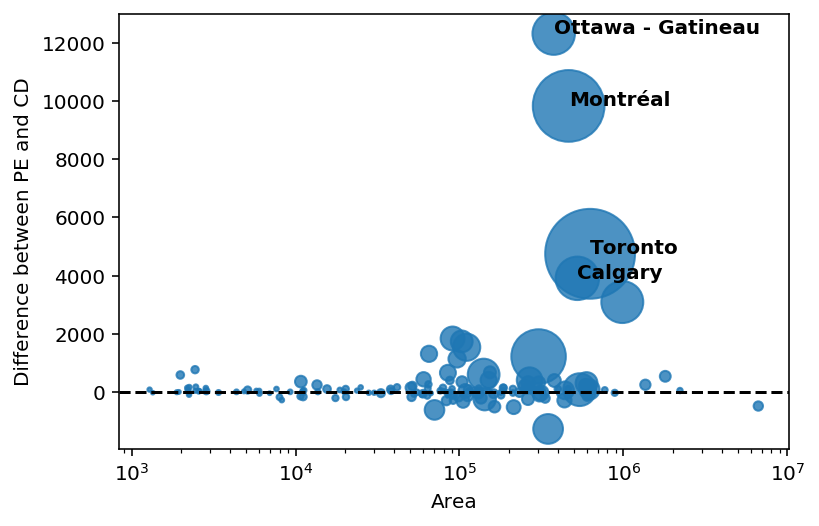

Upper secondary


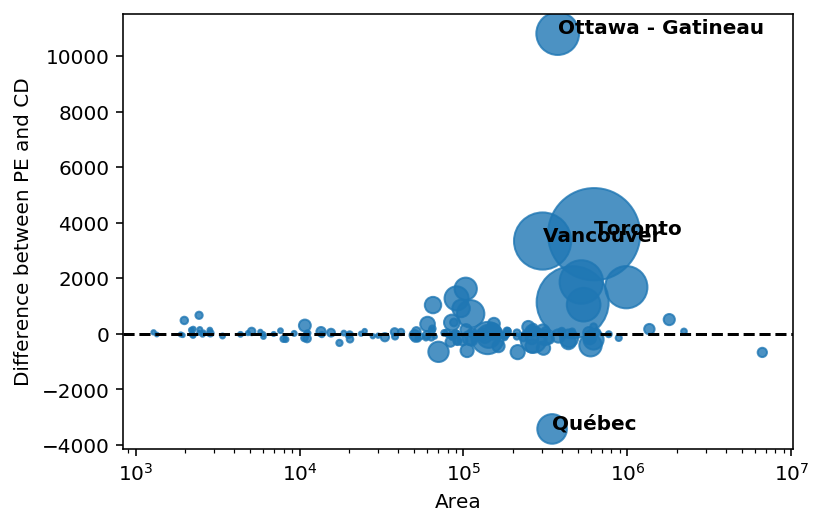

In [13]:
for x in range(len(Levels)):
    MergedData['Label_'+Levels[x]] = np.where(MergedData['Dif_'+Levels[x]]>=MergedData['Dif_'+Levels[x]].mean()+2*MergedData['Dif_'+Levels[x]].std(), MergedData['Name'],
                                              np.where(MergedData['Dif_'+Levels[x]]<=-MergedData['Dif_'+Levels[x]].mean()-2*MergedData['Dif_'+Levels[x]].std(), MergedData['Name'], ''))
    print(bars[x])
    p1 = sns.regplot(x=MergedData['Area'], y=MergedData['Dif_'+Levels[x]], scatter_kws={'s':MergedData['CD_'+Levels[x]]/100}, fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['Area'][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

If this methodology is to predict accurately the same information obtained from the Census, a regression fit between both series should yield a regression coefficient close to one. 

In [14]:
Results = {}
for x in range(len(Levels)):
    formula = "PE_"+Levels[x]+"_std ~ CD_"+Levels[x]+"_std"
    result = sm.ols(formula=formula, data=MergedData).fit()
    heteroscedasticity_test = diag.het_breuschpagan(result.resid, result.model.exog)
    if heteroscedasticity_test[-1] <= 0.05:
        # The hypothesis that the error variance does not depend on x is rejected. There exists heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit(cov_type='HC0')
        print("Robust regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'Yes'}
    else:
        # The hypothesis that the error variance does not depend on x is kept. There is no heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit()
        print("Regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue[0][0]))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'No'}


Robust regression results for Pre-primary

                            OLS Regression Results                            
Dep. Variable:      PE_PrePrimary_std   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     687.4
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           6.95e-58
Time:                        11:44:34   Log-Likelihood:                 165.17
No. Observations:                 152   AIC:                            -326.3
Df Residuals:                     150   BIC:                            -320.3
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [15]:
Results = pd.DataFrame.from_dict(Results)
Results = Results.transpose()
Results['ConfidenceInterval'] = 1.98*Results['Std']
Results['Color'] = np.where(Results['Robust']=='Yes','lightblue','darkolivegreen')
Results = Results.transpose()
Results

PrePrimary             Primary  \
Coefficient                   0.996641            0.997198   
Std                          0.0380128           0.0334262   
t_test                      -0.0883697          -0.0838216   
p_value             0.9295828604520012  0.9331982344111208   
R_square                      0.993293            0.994404   
Robust                             Yes                 Yes   
ConfidenceInterval           0.0752653           0.0661839   
Color                        lightblue           lightblue   

                                LowSec              UppSec  
Coefficient                   0.998627            0.999059  
Std                          0.0165848           0.0075601  
t_test                      -0.0827735           -0.124501  
p_value             0.9340316108327483  0.9009187714337197  
R_square                      0.997256            0.998118  
Robust                             Yes                 Yes  
ConfidenceInterval           0.0328379            0.014969  
Color                        lightblue           lightblue

We find that these coefficients are statistically equal to 1, with 99% of confidence. 

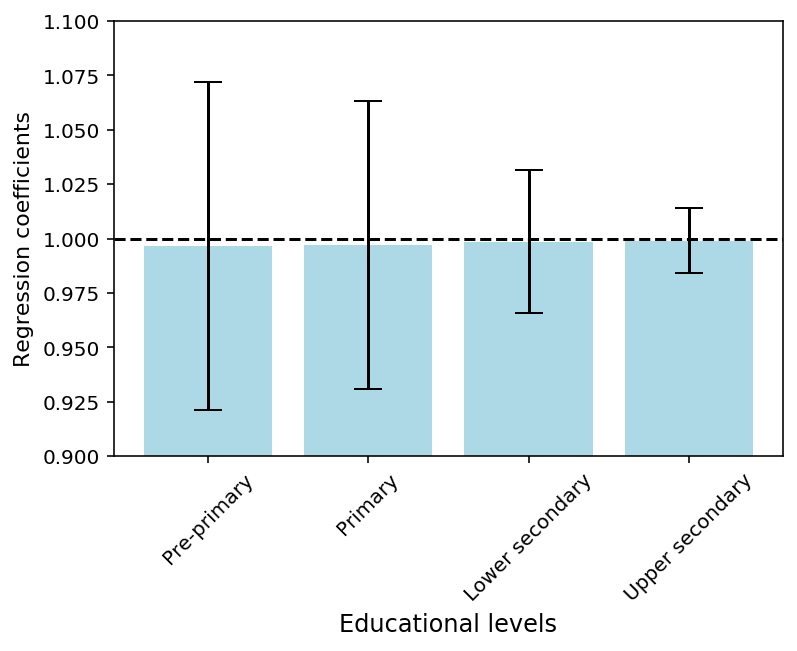

In [16]:
height = list(Results.loc['Coefficient'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
yer1 = list(Results.loc['ConfidenceInterval'])
plt.bar(y_pos, height, yerr=yer1, capsize=7, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('Regression coefficients', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.9,1.1)
plt.show()

Furthermore, as is to be expected of such a methodology, the regression fit, the R squared, is very close to 1, which indicated potential multicollineality (a positive trait in this case).

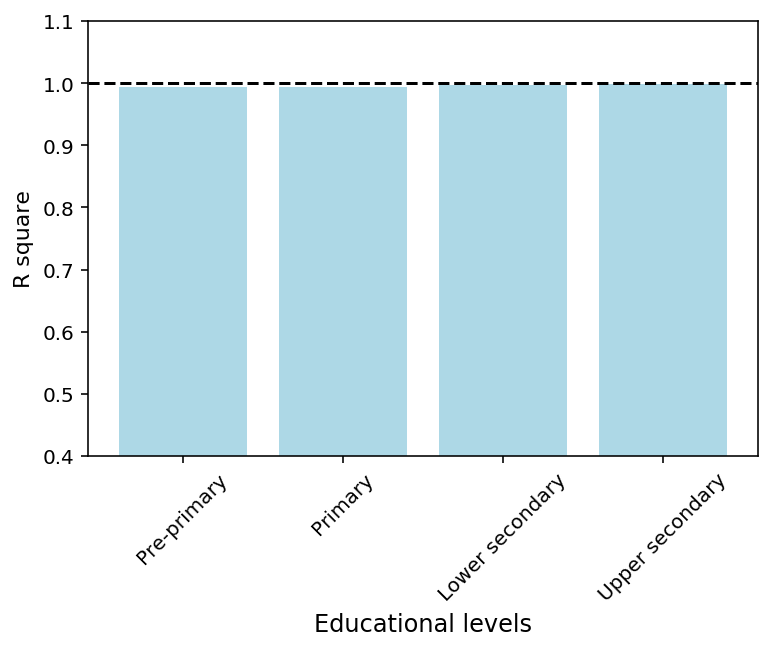

In [17]:
height = list(Results.loc['R_square'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('R square', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.4,1.1)
plt.show()

Testing for normality of the difference between both series shows there is not normality, although this is mainly because of considerable outliers (those highly populated areas seen before). 

In [18]:
for x in range(len(Levels)):
    sns.distplot( MergedData["Dif_"+Levels[x]+"_std"])
    plt.xlabel(bars[x])
    plt.show()
    jbt = jarque_bera(MergedData["Dif_"+Levels[x]+"_std"])
    if jbt[1]>0.05:
        print("The difference between the Population estimates and the")
        print("Census data is normally distributed for "+bars[x])
    else:
        print("The difference between the Population estimates and the")
        print("Census data is not normally distributed for "+bars[x])

The difference between the Population estimates and the
Census data is not normally distributed for Pre-primary


The difference between the Population estimates and the
Census data is not normally distributed for Primary


The difference between the Population estimates and the
Census data is not normally distributed for Lower secondary


The difference between the Population estimates and the
Census data is not normally distributed for Upper secondary


Most of these outliers are eliminated once this is taken into account (by normalizing the difference between both series by the actual number of inhabitants).

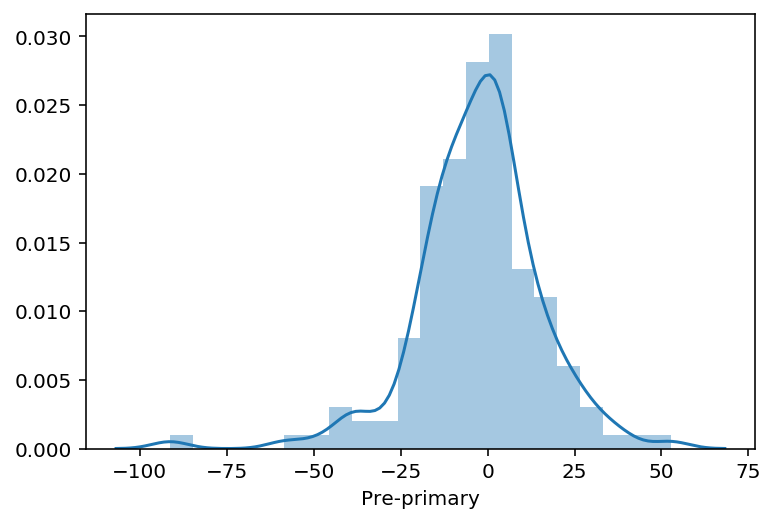

The difference between the Population estimates and the
Census data is not normally distributed for Pre-primary


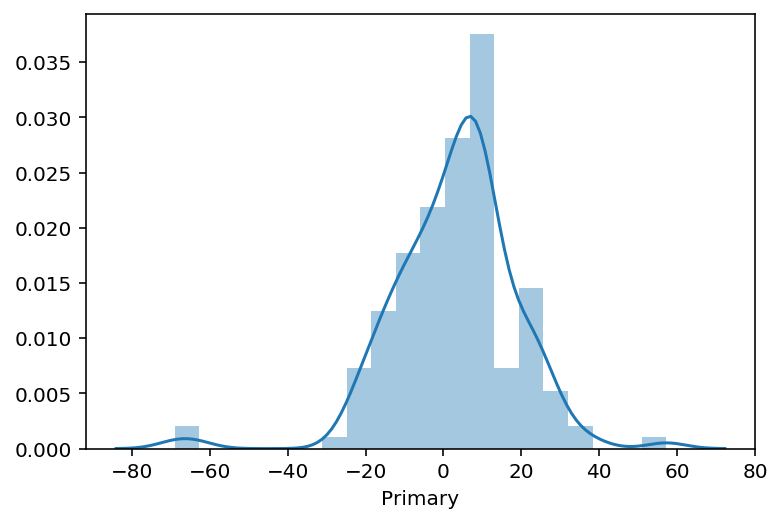

The difference between the Population estimates and the
Census data is not normally distributed for Primary


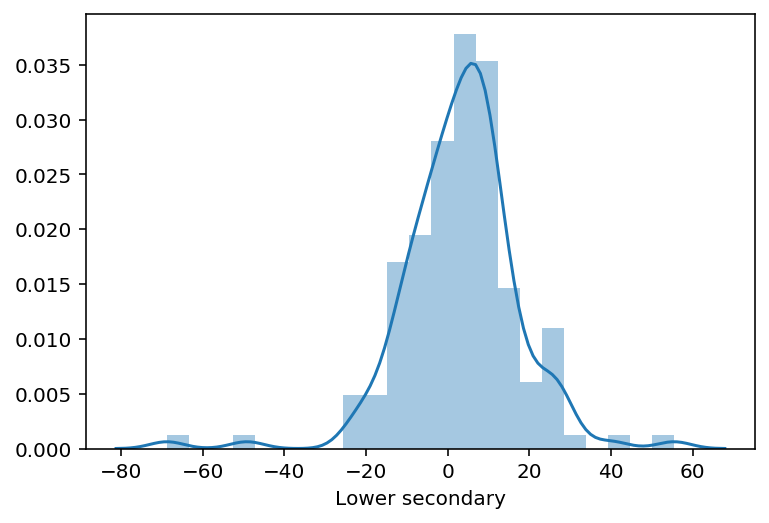

The difference between the Population estimates and the
Census data is not normally distributed for Lower secondary


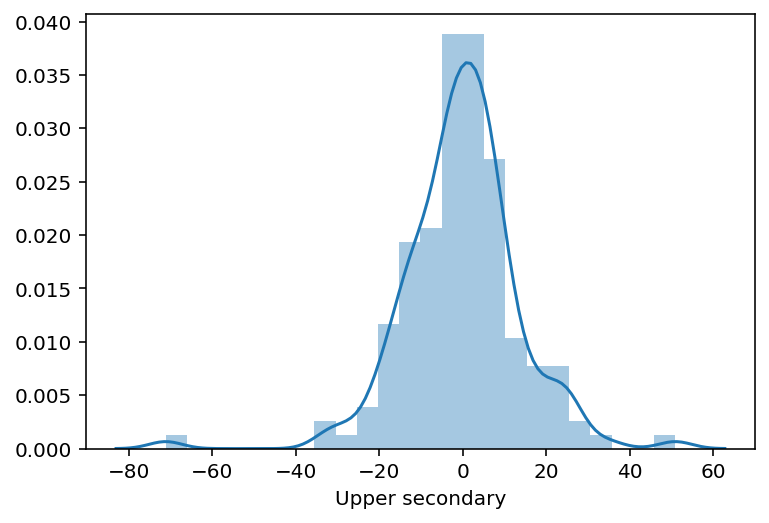

The difference between the Population estimates and the
Census data is not normally distributed for Upper secondary


In [19]:
for x in range(len(Levels)):
    MergedData['Perc_Dif_'+Levels[x]] = MergedData['Dif_'+Levels[x]]/MergedData['CD_'+Levels[x]]*100
    sns.distplot( MergedData['Perc_Dif_'+Levels[x]])
    plt.xlabel(bars[x])
    plt.show()
    jbt = jarque_bera(MergedData['Perc_Dif_'+Levels[x]])
    if jbt[1]>0.05:
        print("The difference between the Population estimates and the")
        print("Census data is normally distributed for "+bars[x])
    else:
        print("The difference between the Population estimates and the")
        print("Census data is not normally distributed for "+bars[x])

Finally, we see there is a high level of heteroscedasticity (as a function of the population size), with variance increasing with the number of people per administrative unit in the census...

Pre-primary


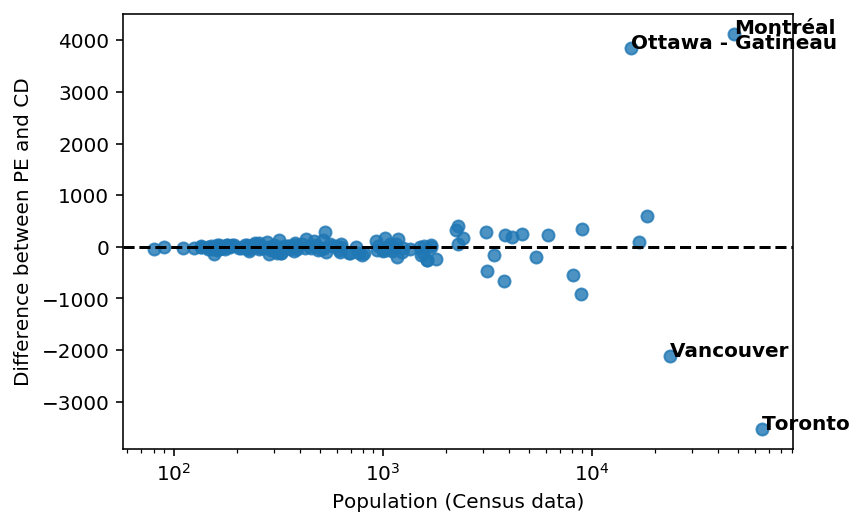

Primary


Lower secondary


Upper secondary


In [20]:
for x in range(len(Levels)):
    print(bars[x])
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Dif_'+Levels[x]], fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

... but such a behavior disappears once we use the percentage of the difference as a function of the total population, rather than the population as a whole. 

Pre-primary


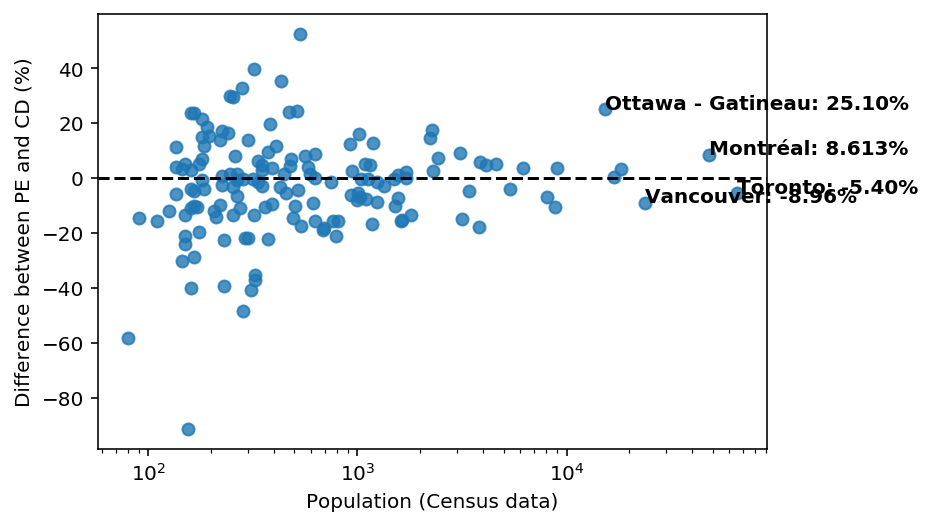

Primary


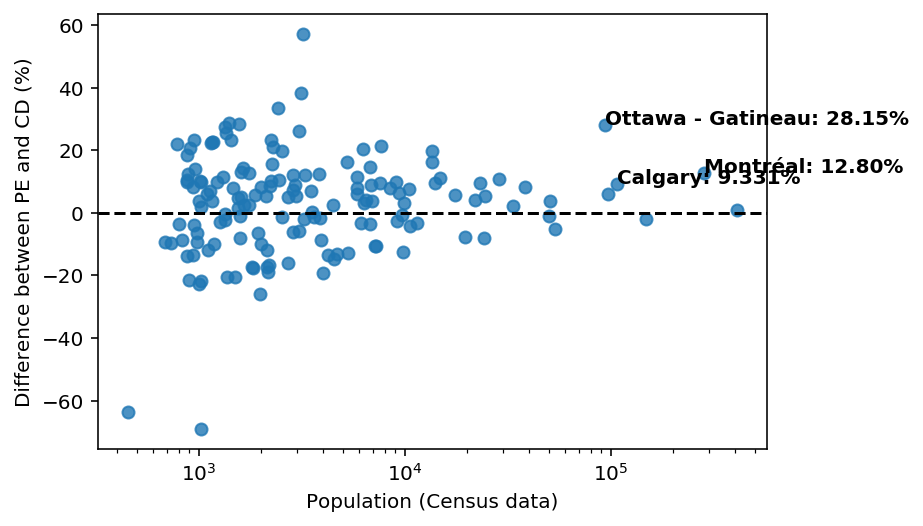

Lower secondary


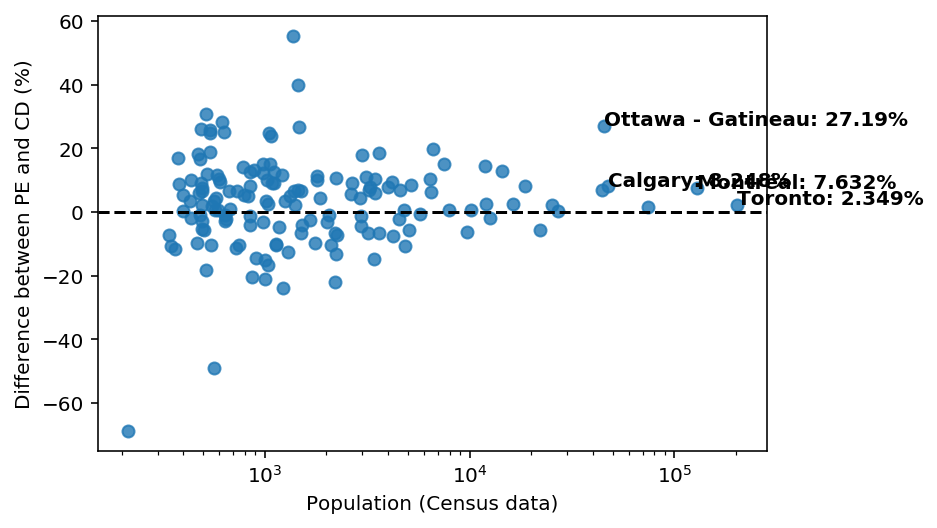

Upper secondary


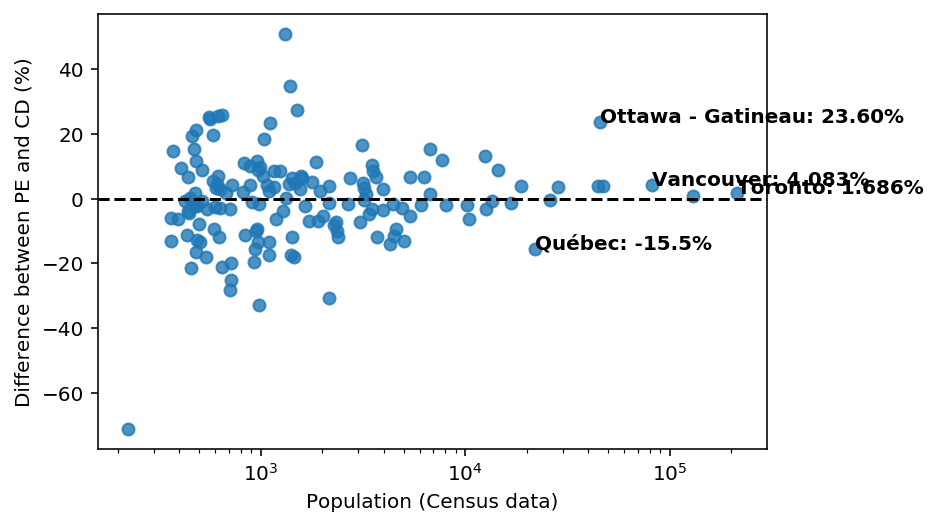

In [21]:
for x in range(len(Levels)):
    print(bars[x])
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Perc_Dif_'+Levels[x]], fit_reg=False)
    for line in range(0,MergedData.shape[0]):
        if MergedData['Label_'+Levels[x]][line]!='':
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line]+': '+str(MergedData['Perc_Dif_'+Levels[x]][line])[:5]+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
        else:
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD (%)')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

The methodology holds even when looking at the odds ratio between Females and Males.

Pre-primary


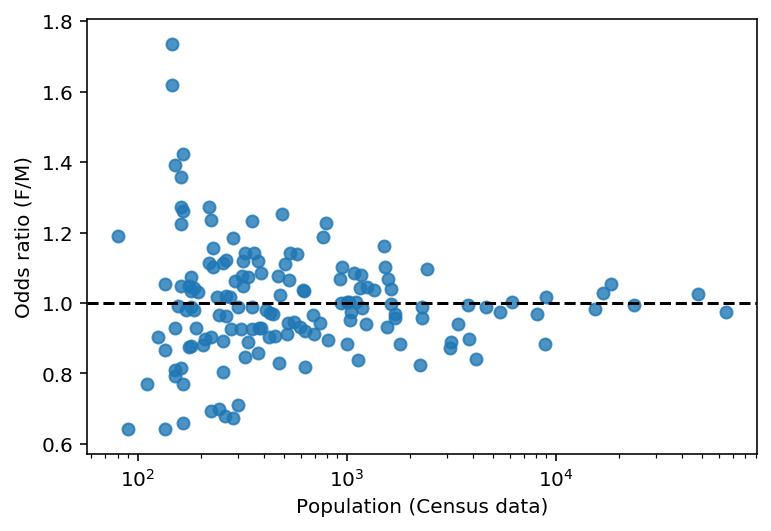

Primary


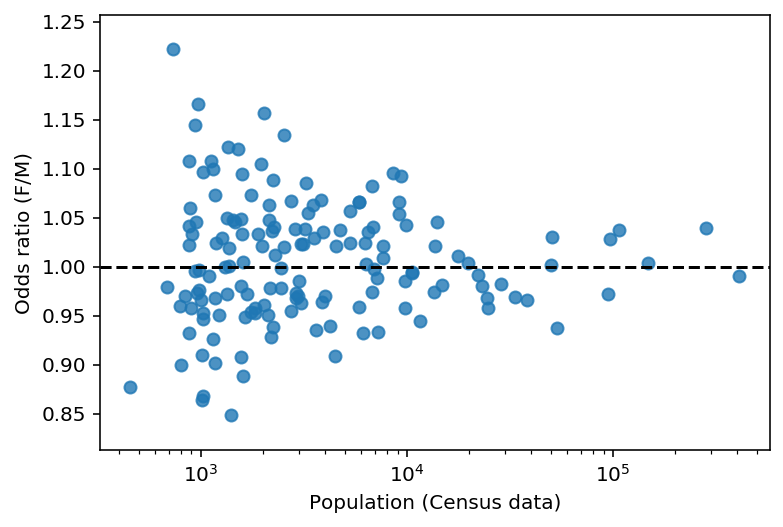

Lower secondary


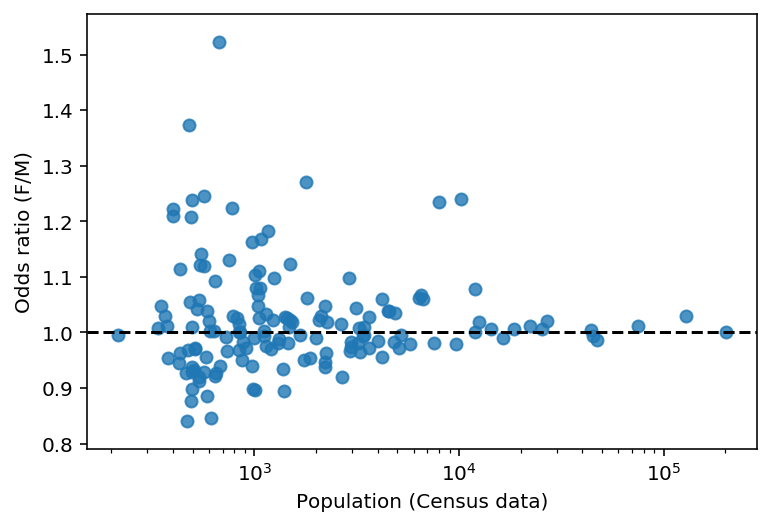

Upper secondary


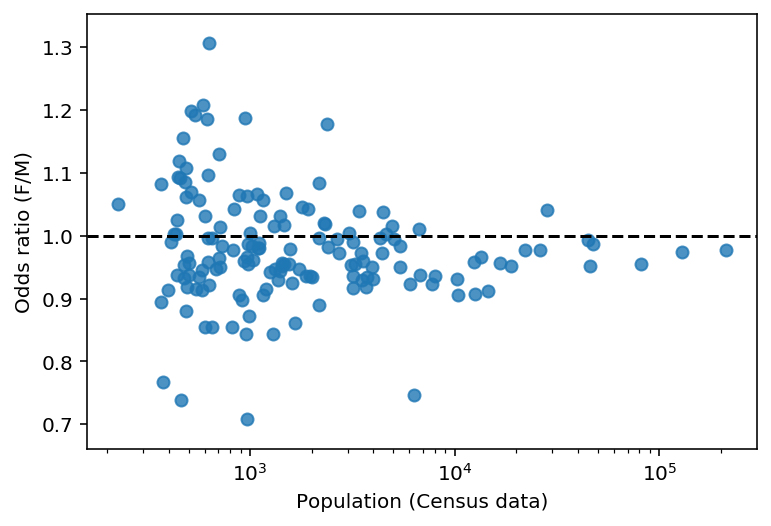

In [22]:
for x in range(len(Levels)):
    print(bars[x])
    MergedData['OddsRatio_'+Levels[x]] = (MergedData['PE_'+Levels[x]+'_Female']/MergedData['CD_'+Levels[x]+'_Female'])/(MergedData['PE_'+Levels[x]+'_Male']/MergedData['CD_'+Levels[x]+'_Male'])
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['OddsRatio_'+Levels[x]], fit_reg=False)
    plt.ylabel('Odds ratio (F/M)')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=1, color='black', linestyle='dashed')
    plt.show()